# Machine learning demo code use library

## Đọc dữ liệu

In [41]:
import pandas as pd

# Replace with the actual file path if needed
data = pd.read_excel('D:\\Machine_learning\\Data_project\\dataset_02052023.xlsx')
print(data)

       Num                 Timestamp  Current_J0  Temperature_T0  Current_J1  \
0        1  2022-10-26T08:17:21.847Z    0.109628         27.8750   -2.024669   
1        2  2022-10-26T08:17:22.852Z    0.595605         27.8750   -2.278456   
2        3  2022-10-26T08:17:23.857Z   -0.229474         27.8750   -2.800408   
3        4  2022-10-26T08:17:24.863Z    0.065053         27.8750   -3.687768   
4        5  2022-10-26T08:17:25.877Z    0.884140         27.8750   -2.938830   
...    ...                       ...         ...             ...         ...   
7404  7405  2022-10-26T15:36:02.555Z   -0.109017         37.1875   -2.261695   
7405  7406  2022-10-26T15:36:03.562Z   -0.098536         37.1875   -2.251992   
7406  7407  2022-10-26T15:36:04.571Z   -0.121100         37.1875   -2.280791   
7407  7408  2022-10-26T15:36:05.572Z   -0.129370         37.1875   -2.269061   
7408  7409  2022-10-26T15:36:06.580Z   -0.134429         37.1250   -2.244449   

      Temperature_J1  Current_J2  Tempe

## Tiền xử lý dữ liệu:

In [42]:
# Kiểm tra các giá trị bị thiếu
print(data.isnull().sum())

Num                      0
Timestamp                0
Current_J0              46
Temperature_T0          54
Current_J1              54
Temperature_J1          54
Current_J2              54
Temperature_J2          54
Current_J3              54
Temperature_J3          54
Current_J4              54
Temperature_J4          54
Current_J5              54
Temperature_J5          54
Speed_J0                54
Speed_J1                54
Speed_J2                54
Speed_J3                54
Speed_J4                54
Speed_J5                54
Tool_current            54
cycle                    0
Robot_ProtectiveStop    54
grip_lost                0
dtype: int64


In [43]:
# Thay giá trị bị thiếu bằng giá trị trung vị (Median) của cột
for i in {"Current_J0", "Temperature_T0", "Current_J1", "Temperature_J1", "Current_J2", "Temperature_J2", "Current_J3", "Temperature_J3", 
          "Current_J4", "Temperature_J4", "Current_J5", "Temperature_J5", 
          "Speed_J0", "Speed_J1", "Speed_J2", "Speed_J3", "Speed_J4", "Speed_J5", 
          "Tool_current", "Robot_ProtectiveStop"}:
    data[i].fillna(data[i].median(), inplace=True)

print(data.isnull().sum())
print(data)

Num                     0
Timestamp               0
Current_J0              0
Temperature_T0          0
Current_J1              0
Temperature_J1          0
Current_J2              0
Temperature_J2          0
Current_J3              0
Temperature_J3          0
Current_J4              0
Temperature_J4          0
Current_J5              0
Temperature_J5          0
Speed_J0                0
Speed_J1                0
Speed_J2                0
Speed_J3                0
Speed_J4                0
Speed_J5                0
Tool_current            0
cycle                   0
Robot_ProtectiveStop    0
grip_lost               0
dtype: int64
       Num                 Timestamp  Current_J0  Temperature_T0  Current_J1  \
0        1  2022-10-26T08:17:21.847Z    0.109628         27.8750   -2.024669   
1        2  2022-10-26T08:17:22.852Z    0.595605         27.8750   -2.278456   
2        3  2022-10-26T08:17:23.857Z   -0.229474         27.8750   -2.800408   
3        4  2022-10-26T08:17:24.863Z    0.0

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_5660\1713655945.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].median(), inplace=True)
C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_5660\1713655945.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [44]:
# Chuyển các giá trị boolean thành giá trị số
# Quy ước True = 1, False = 0
# Chuyển toàn bộ cột kiểu Boolean thành số
# Xử lý các cột Boolean (True/False)
for col in data.columns:
    if data[col].dtype == 'bool':  # Kiểu dữ liệu Boolean
        data[col] = data[col].astype(int)
    elif data[col].isin(['True', 'False']).all():  # Kiểm tra nếu cột chứa chuỗi True/False
        data[col] = data[col].replace({'True': 1, 'False': 0})
print(data)

       Num                 Timestamp  Current_J0  Temperature_T0  Current_J1  \
0        1  2022-10-26T08:17:21.847Z    0.109628         27.8750   -2.024669   
1        2  2022-10-26T08:17:22.852Z    0.595605         27.8750   -2.278456   
2        3  2022-10-26T08:17:23.857Z   -0.229474         27.8750   -2.800408   
3        4  2022-10-26T08:17:24.863Z    0.065053         27.8750   -3.687768   
4        5  2022-10-26T08:17:25.877Z    0.884140         27.8750   -2.938830   
...    ...                       ...         ...             ...         ...   
7404  7405  2022-10-26T15:36:02.555Z   -0.109017         37.1875   -2.261695   
7405  7406  2022-10-26T15:36:03.562Z   -0.098536         37.1875   -2.251992   
7406  7407  2022-10-26T15:36:04.571Z   -0.121100         37.1875   -2.280791   
7407  7408  2022-10-26T15:36:05.572Z   -0.129370         37.1875   -2.269061   
7408  7409  2022-10-26T15:36:06.580Z   -0.134429         37.1250   -2.244449   

      Temperature_J1  Current_J2  Tempe

## Giảm chiều dữ liệu

*  Principal Component Analysis (PCA)

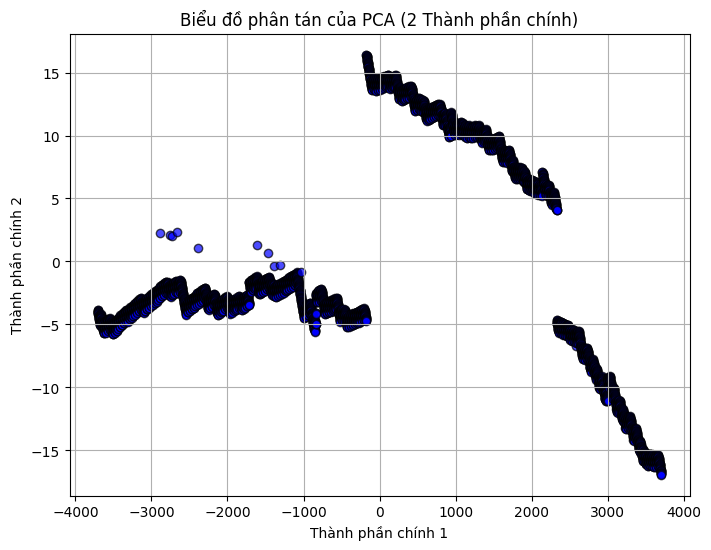

In [45]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Loại các cột không phải là số
features_PCA = data.select_dtypes(include=['float64', 'int64'])

# Apply PCA
pca = PCA(n_components=2)  # Giảm xuống 2 thành phần chính
reduced_PCA = pca.fit_transform(features_PCA)

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced_PCA[:, 0], reduced_PCA[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.title('Biểu đồ phân tán của PCA (2 Thành phần chính)')
plt.xlabel('Thành phần chính 1')
plt.ylabel('Thành phần chính 2')
plt.grid(True)
plt.show()


* Linear Discriminant Analysis (LDA) 

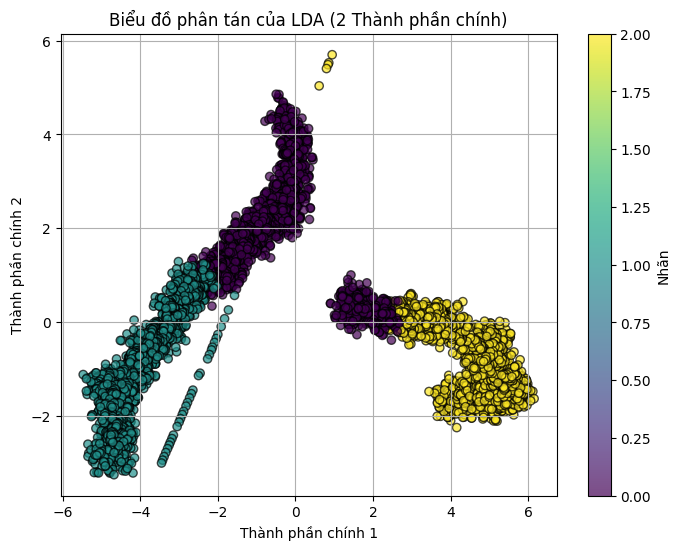

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Copy data
data_LDA = data
# Tách đặc trưng (features) và nhãn (target)
X = data_LDA.select_dtypes(include=['float64', 'int64'])  # Các cột đặc trưng số

# Tìm nhãn cho dữ liệu
from sklearn.cluster import KMeans
# Áp dụng K-Means để phân cụm
kmeans = KMeans(n_clusters=3, random_state=42)  # Chia thành 3 cụm
labels = kmeans.fit_predict(X)

# Thêm nhãn vào DataFrame
data_LDA['label'] = labels
y = data_LDA['label']  # Thay 'label' bằng tên cột chứa nhãn (target)

# Áp dụng LDA
lda = LDA(n_components=2)  # Giảm xuống 2 thành phần
reduced_LDA = lda.fit_transform(X, y)

import matplotlib.pyplot as plt

# Vẽ biểu đồ scatter plot cho LDA
plt.figure(figsize=(8, 6))
plt.scatter(reduced_LDA[:, 0], reduced_LDA[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('Biểu đồ phân tán của LDA (2 Thành phần chính)')
plt.xlabel('Thành phần chính 1')
plt.ylabel('Thành phần chính 2')
plt.colorbar(label='Nhãn')
plt.grid(True)
plt.show()

## Phân cụm dữ liệu

* Thuật toán KMeans

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Copy dữ liệu
data_cluster = data
# Lựa chọn các cột số làm đặc trưng (features)
features = data_cluster.select_dtypes(include=['float64', 'int64'])

# Áp dụng KMeans để phân cụm dữ liệu
kmeans = KMeans(n_clusters=3, random_state=42)  # Số cụm bạn muốn (ở đây là 3)
labels = kmeans.fit_predict(features)

# Thêm nhãn vào DataFrame
data_cluster['label'] = labels
print(labels)

[2 2 2 ... 1 1 1]


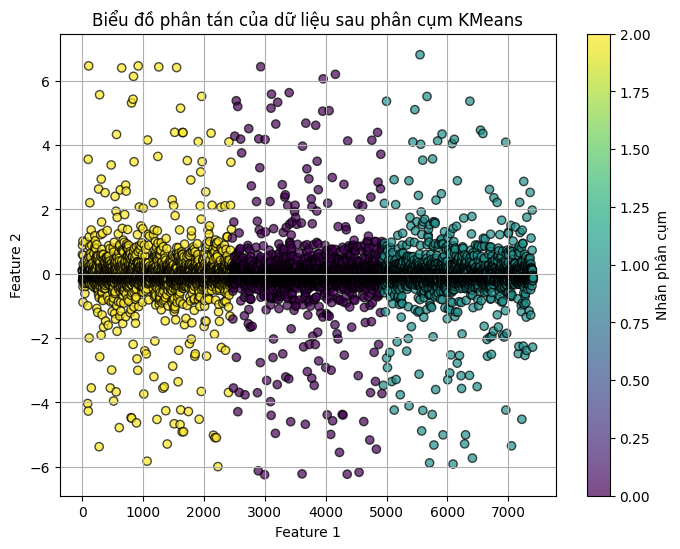

In [49]:
# Vẽ đồ thị phân tán (scatter plot) với 2 thành phần chính của PCA hoặc trực tiếp
plt.figure(figsize=(8, 6))
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=labels, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('Biểu đồ phân tán của dữ liệu sau phân cụm KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Nhãn phân cụm')
plt.grid(True)
plt.show()

* Thuật toán DBScan

In [50]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Lựa chọn các cột số làm đặc trưng (features)
features = data_cluster.select_dtypes(include=['float64', 'int64'])

# Áp dụng DBSCAN để phân cụm dữ liệu
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps là bán kính khu vực lân cận, min_samples là số lượng điểm tối thiểu trong khu vực để tạo thành một cụm
labels_dbscan = dbscan.fit_predict(features)

# Thêm nhãn vào DataFrame
data_cluster['label_dbscan'] = labels_dbscan
print(labels_dbscan)
print(data)

[-1 -1 -1 ... -1 -1 -1]
       Num                 Timestamp  Current_J0  Temperature_T0  Current_J1  \
0        1  2022-10-26T08:17:21.847Z    0.109628         27.8750   -2.024669   
1        2  2022-10-26T08:17:22.852Z    0.595605         27.8750   -2.278456   
2        3  2022-10-26T08:17:23.857Z   -0.229474         27.8750   -2.800408   
3        4  2022-10-26T08:17:24.863Z    0.065053         27.8750   -3.687768   
4        5  2022-10-26T08:17:25.877Z    0.884140         27.8750   -2.938830   
...    ...                       ...         ...             ...         ...   
7404  7405  2022-10-26T15:36:02.555Z   -0.109017         37.1875   -2.261695   
7405  7406  2022-10-26T15:36:03.562Z   -0.098536         37.1875   -2.251992   
7406  7407  2022-10-26T15:36:04.571Z   -0.121100         37.1875   -2.280791   
7407  7408  2022-10-26T15:36:05.572Z   -0.129370         37.1875   -2.269061   
7408  7409  2022-10-26T15:36:06.580Z   -0.134429         37.1250   -2.244449   

      Temperatu

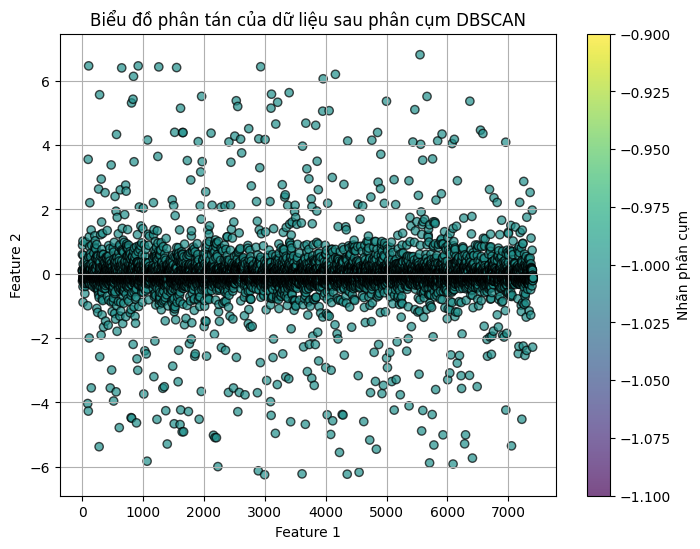

In [38]:
# Vẽ đồ thị phân tán (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=labels_dbscan, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('Biểu đồ phân tán của dữ liệu sau phân cụm DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Nhãn phân cụm')
plt.grid(True)
plt.show()

## Phân loại dữ liệu

* Naive Bayess

Độ chính xác: 84.03%


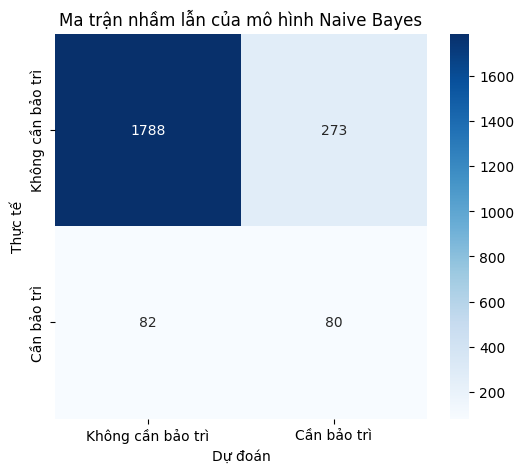

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo nhãn MaintenanceRequired
data['MaintenanceRequired'] = ((data['Robot_ProtectiveStop'] == 1) | (data['grip_lost'] == 1)).astype(int)

# Lựa chọn các cột số làm đặc trưng
features = data[['Current_J0', 'Temperature_T0', 'Current_J1', 'Temperature_J1', 'Current_J2', 
    'Temperature_J2', 'Current_J3', 'Temperature_J3', 'Current_J4', 'Temperature_J4', 
    'Current_J5', 'Temperature_J5', 'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 
    'Speed_J4', 'Speed_J5', 'Tool_current']]

labels = data['MaintenanceRequired']  # Nhãn 0 hoặc 1, xác định có cần bảo trì hay không

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Khởi tạo mô hình Naive Bayes
model = GaussianNB()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# In độ chính xác và ma trận nhầm lẫn
print(f"Độ chính xác: {accuracy * 100:.2f}%")

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Không cần bảo trì', 'Cần bảo trì'], yticklabels=['Không cần bảo trì', 'Cần bảo trì'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn của mô hình Naive Bayes')
plt.show()

* Perceptron:

Độ chính xác: 92.17%


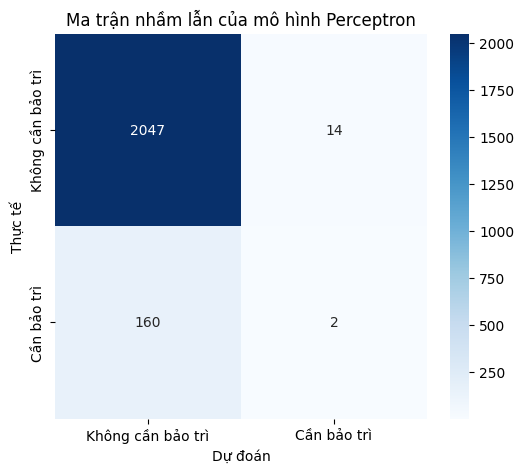

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo nhãn MaintenanceRequired
data['MaintenanceRequired'] = ((data['Robot_ProtectiveStop'] == 1) | (data['grip_lost'] == 1)).astype(int)

# Lựa chọn các cột số làm đặc trưng
# Lựa chọn các cột số làm đặc trưng
features = data[['Current_J0', 'Temperature_T0', 'Current_J1', 'Temperature_J1', 'Current_J2', 
    'Temperature_J2', 'Current_J3', 'Temperature_J3', 'Current_J4', 'Temperature_J4', 
    'Current_J5', 'Temperature_J5', 'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 
    'Speed_J4', 'Speed_J5', 'Tool_current']]

labels = data['MaintenanceRequired']  # Nhãn 0 hoặc 1, xác định có cần bảo trì hay khônglabels = data['MaintenanceRequired']  # Nhãn 0 hoặc 1, xác định có cần bảo trì hay không

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Tiến hành chuẩn hóa dữ liệu (scaling) vì Perceptron nhạy cảm với tỷ lệ của các đặc trưng
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo mô hình Perceptron và huấn luyện
model = Perceptron(random_state=42)
model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# In độ chính xác và ma trận nhầm lẫn
print(f"Độ chính xác: {accuracy * 100:.2f}%")

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Không cần bảo trì', 'Cần bảo trì'], yticklabels=['Không cần bảo trì', 'Cần bảo trì'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn của mô hình Perceptron')
plt.show()
